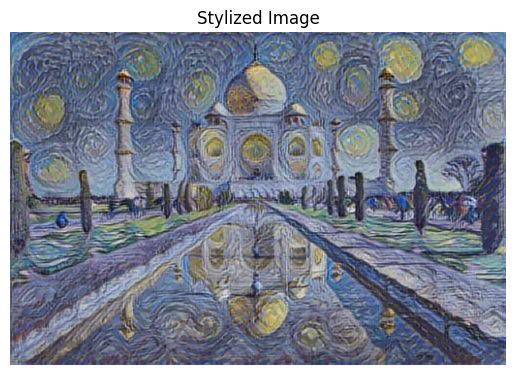

In [54]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to load and preprocess image
def load_image(image_path, max_dim=512):
    # Read and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)

    # Resize image maintaining aspect ratio
    shape = tf.cast(tf.shape(image)[:-1], tf.float32)
    long_side = max(shape)
    scale = max_dim / long_side
    new_shape = tf.cast(shape * scale, tf.int32)

    image = tf.image.resize(image, new_shape)
    image = image[tf.newaxis, :]  # Add batch dimension
    return image

# Function to convert tensor to displayable image
def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    else:
        raise Exception("Input tensor must have more than 3 dimensions.")
    return Image.fromarray(tensor)

# Load content and style images
content_image = load_image('content.jpg')
style_image = load_image('style.jpg')

# Load pre-trained style transfer model from TensorFlow Hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# Apply style transfer
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

# Convert tensor to image and display
output_image = tensor_to_image(stylized_image)

# Display the result
plt.imshow(output_image)
plt.axis('off')
plt.title('Stylized Image')
plt.show()
